## Chocolate Soup

In this notebook, I'll scrape data about chocolate bars from the web with Beautiful Soup, clean it with Pandas, and visualize/analyze it with Matplotlib and Pandas.

##### Import necessary modules.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import re

##### Set up the soup.

In [2]:
url='https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html'
webpage = requests.get(url)
soup = BeautifulSoup(webpage.content,'html.parser')

##### Create dictionary, fill it with scraped data.

In [3]:
chocolate_dict = {}

# Original approach of scraping column names for dataframe
# col_names = []
# for table_data in table_rows[0].find_all('td'):
#   col_name = re.sub(r'[ \n\xa0]+',' ',table_data.get_text()).rstrip()
#   chocolate_dict[col_name] = []
#   col_names.append(col_name)

# Declaring column names rather than scraping them is much simpler, and gives more succint column names.
col_names = ['Company','Specific Bean Origin','REF','Review Year','Percent Cocoa','Company Location','Rating','Bean Type','Broad Bean Origin']
for col_name in col_names:
  chocolate_dict[col_name] = []

table_rows = soup.select('#cacaoTable')[0].find_all('tr')
for table_row in table_rows[1:]:
  for i,table_data in enumerate(table_row.find_all('td')):
    chocolate_dict[col_names[i]].append(table_data.get_text())

##### Read dictionary into DataFrame and view.

In [4]:
chocolate_df = pd.DataFrame.from_dict(chocolate_dict)
chocolate_df

,Company,Specific Bean Origin,REF,Review Year,Percent Cocoa,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.5,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.5,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.5,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.5,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4,,Peru


##### Data Cleaning
Make data appropriate type, separate data into appropriate columns, make blank values NaN. View cleaned data.

In [5]:
chocolate_df['Review Year'] = chocolate_df['Review Year'].astype(int)
chocolate_df['Percent Cocoa'] = chocolate_df['Percent Cocoa'].str.replace('%','').astype(float)
chocolate_df['Maker'] = chocolate_df['Company'].str.extract(r'((?<=\().*(?=\)))',expand=False)
chocolate_df['Company'] = chocolate_df['Company'].str.extract(r'(.*(?= \(.*)|.*)',expand=False)
chocolate_df['Rating'] = chocolate_df['Rating'].astype(float)
chocolate_df['REF'] = chocolate_df['REF'].astype(int)
chocolate_df.replace('\xa0',np.NaN,inplace=True)
chocolate_df

,Company,Specific Bean Origin,REF,Review Year,Percent Cocoa,Company Location,Rating,Bean Type,Broad Bean Origin,Maker
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,NaN,Sao Tome,NaN
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,NaN,Togo,NaN
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,NaN,Togo,NaN
3,A. Morin,Akata,1680,2015,70.0,France,3.50,NaN,Togo,NaN
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,NaN,Peru,NaN
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela,NaN
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,NaN,Cuba,NaN
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela,NaN
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela,NaN
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,NaN,Peru,NaN


#### Examine the distribution of ratings given.

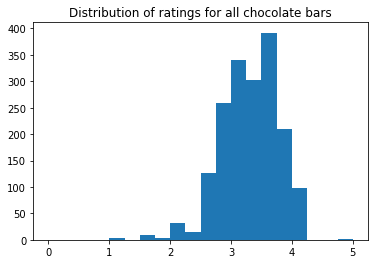

In [6]:
plt.title('Distribution of ratings for all chocolate bars')
plt.hist(chocolate_df['Rating'], bins=20, range=(0,5))
plt.show()

In [7]:
chocolate_df[chocolate_df['Rating']>=4].Rating.count()

100

It appears that over half of the chocolates are rated between a 3 and 4, with only 100 out of 1795 (5.6%) rated at least 4.

#### What are the highest rated chocolate companies?

In [8]:
average_rating_by_company = chocolate_df[['Company','Rating']].groupby('Company',as_index=False).Rating.mean()
average_rating_by_company = average_rating_by_company.rename(columns={'Rating':'Average Rating'}).sort_values('Average Rating',ascending=False).reset_index(drop=True)
average_rating_by_company[0:10]

,Company,Average Rating
0,Tobago Estate,4.000000
1,Ocelot,3.875000
2,Amedei,3.846154
3,Matale,3.812500
4,Patric,3.791667
5,Idilio,3.775000
6,Un Dimanche A Paris,3.750000
7,Obolo,3.750000
8,Dole,3.750000
9,Chocola'te,3.750000


It appears that Tobago chocolates are the best rated by far, having an average rating .125 greater than the closest competitor, while all other average ratings listed are within .035 of a competitor.

#### Is the percentage of cocao correlated with the rating?

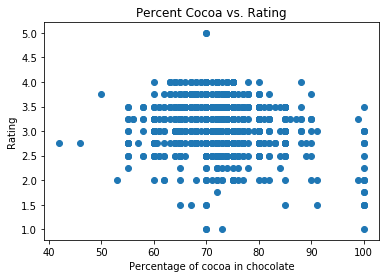

In [9]:
plt.title('Percent Cocoa vs. Rating')
plt.xlabel('Percentage of cocoa in chocolate')
plt.ylabel('Rating')
plt.scatter(chocolate_df['Percent Cocoa'],chocolate_df['Rating'])
plt.show()

There appears to be no significant correlation between a chocolate's rating and the percentage of cocoa.